## *Est-ce que la passage à la base latine a simplifié les langues turcophones ?* 

# 1. Introduction: 


Après la chute de l'Empire ottoman, Mustafa Kemal Atatürk a initié des réformes radicales pour moderniser la Turquie. En 1928, dans le cadre de la "Révolution des signes" (Harf Devrimi), il a remplacé l'alphabet arabe, utilisé depuis des siècles pour transcrire le turc, par un alphabet dérivé du latin, estimant que ce dernier était mieux adapté à la phonologie turque et faciliterait l'apprentissage de la langue. 


Cette réforme visait également à augmenter le taux d'alphabétisation, qui était alors inférieur à 10%, en simplifiant l'apprentissage de la lecture et de l'écriture. 


D'autres pays turcophones, tels que l'Azerbaïdjan, le Kazakhstan, l'Ouzbékistan et le Turkménistan, ont également adopté l'alphabet latin pour leurs langues respectives, bien que ces langues présentent des différences significatives et que les locuteurs ne se comprennent pas nécessairement entre eux. 


Cela soulève la question suivante : le passage à l'alphabet latin a-t-il réellement simplifié les langues turques ?

Pour explorer cette problématique, nous formulons les hypothèses suivantes :

- H1 : Le passage à l'alphabet latin a réduit le nombre de mots par phrase.
- H2 : Il a diminué le nombre de caractères par mot.
- H3 : Il a réduit le nombre de consonnes par mot.
- H4 : Il a diminué le nombre de voyelles par mot.

# 2. Importation du jeu de donnée

In [1]:
# Importation des bibliothèques nécessaires pour l'analyse et la visualisation

import pandas as pd  # Bibliothèque utilisée pour la manipulation et l'analyse de données tabulaires.
import scipy.stats as stats  # Module de la bibliothèque SciPy pour effectuer des tests statistiques et manipuler des distributions.
import statsmodels.api as sm  # Bibliothèque pour effectuer des analyses statistiques avancées, notamment des modèles de régression.
import matplotlib.pyplot as plt  # Bibliothèque de visualisation pour créer des graphiques 2D.
import seaborn as sns  # Extension de Matplotlib pour des visualisations statistiques avancées avec des designs par défaut attrayants.
from statsmodels.formula.api import mixedlm  # Module spécifique pour ajuster des modèles linéaires mixtes à partir de formules.
from statsmodels.regression.linear_model import OLS  # Module pour ajuster des modèles de régression linéaire classique (Ordinary Least Squares).


In [2]:

data = pd.read_excel("data.xlsx"  )
data

,Langue,Texte_ori,Texte_latin
0,Turc,أحببت أن أصف لكم جمال إسطنبول في الربيع، حيث ت...,İstanbul’un baharında güzellikleri anlatmak is...
1,Turc,في تقريرنا اليوم، نسلط الضوء على التغيرات الكب...,"Bugünkü raporumuzda, Türkiye’nin yeni yüzyılın..."
2,Turc,تعلمون أن النظام التعليمي الجديد الذي بدأ تنفي...,"Bildiğiniz gibi, geçen yıl uygulamaya konulan ..."
3,Turc,كان للكتاب في إسطنبول دور كبير في النهضة الثقا...,"İstanbul’daki kitaplar, 19. yüzyılda Türkiye’d..."
4,Turc,تركيا تتميز بتنوعها الجغرافي حيث تمتزج السواحل...,"Türkiye, dağlık kıyılar ile verimli Anadolu ov..."
...,...,...,...
75,Tatar,المطبخ التتاري يقدم أطباقًا مميزة مثل الشيلبيك...,"Tatar oshxonasi, çelpek va qatay kabi o'ziga x..."
76,Tatar,الثقافة التتارية تتميز بمزيجها بين التأثيرات ا...,Tatar madaniyati rus va islomiy ta'sirlarning ...
77,Tatar,يعد نهر الفولغا رمزًا مهمًا لتاريخ التتار وثقا...,Volga daryosi tatar tarixi va madaniyatining m...
78,Tatar,اللغة التتارية هي إحدى اللغات التركية القديمة.,Tatar tili qadimgi turkiy tillardan biridir.




J'ai constitué mon jeu de données grâce à ChatGPT. Pour plusieurs langues turques ayant effectué la transition de l'alphabet arabe à l'alphabet latin, j'ai demandé à ChatGPT de générer 10 phrases pour chaque langue. Ces phrases ont été fournies en alphabet arabe ainsi que leur transcription en alphabet latin. Les langues incluses dans mon jeu de données sont les suivantes :
- Turc 
- Azéri
- Ouzbek  
- Kazakh 
- Turkmène  
- Karakalpak 
- Ouïghour  
- Tatar

J'ai enrichi ce jeu de données lors de la phase de manipulation. À partir des textes originaux et transcrits, j'ai ajouté des colonnes pour extraire et analyser des informations spécifiques, telles que :

- *Nombre de mots* dans les textes originaux (Words_ori) et transcrits (Words_latin).
- *Différence dans le nombre de mots* entre les deux alphabets (Word_difference).
- *Nombre total de caractères* et leur répartition (voyelles et consonnes) dans les deux systèmes.
- *Longueur moyenne des mots* en arabe et en latin (Avg_word_length_ori et Avg_word_length_latin).
- *Analyse des caractères uniques* présents dans chaque texte.

Ces manipulations m'ont permis de structurer les données de manière à faciliter les analyses statistiques et les comparaisons entre les alphabets arabe et latin. 

# 3. Manipulation

In [3]:
# Fonction pour compter les mots dans une phrase
def count_words(phrase):
    if isinstance(phrase, str):  # Vérifie si l'entrée est une chaîne de caractères
        return len(phrase.split())  # Sépare la phrase en mots en utilisant les espaces et retourne le nombre de mots
    return 0  # Si l'entrée n'est pas une chaîne, retourne 0

# Fonction pour compter les caractères dans une phrase
def count_characters(phrase):
    if isinstance(phrase, str):  # Vérifie si l'entrée est une chaîne de caractères
        return len(phrase)  # Retourne la longueur totale de la chaîne (y compris les espaces et signes de ponctuation)
    return 0  # Si l'entrée n'est pas une chaîne, retourne 0

# Fonction pour compter les caractères uniques
def count_unique_characters(phrase):
    if isinstance(phrase, str):  # Vérifie si l'entrée est une chaîne de caractères
        return len(set(phrase.replace(" ", "")))  # Remplace les espaces, puis compte les caractères uniques avec set()
    return 0  # Si l'entrée n'est pas une chaîne, retourne 0

# Définir les voyelles et consonnes pour les alphabets turc et arabe
vowels_turkish = set("aeiouöüâêîôûAEIOUÖÜÂÊÎÔÛıI")  # Ensemble de voyelles en turc (majuscule et minuscule)
consonants_turkish = set("bcçdfgğhjklmnprsştvyzBCÇDFGĞHJKLMNPRSŞTVYZ")  # Ensemble de consonnes en turc
vowels_arabic = set("اويىإآأًٌٍَُِّْ")  # Ensemble de voyelles en arabe
consonants_arabic = set("بتثجحخدذرزسشصضطظعغفقكلمنهء")  # Ensemble de consonnes en arabe

# Fonction pour compter les voyelles dans une phrase
def count_vowels(phrase, vowels):
    if isinstance(phrase, str):  # Vérifie si l'entrée est une chaîne de caractères
        return sum(1 for char in phrase if char in vowels)  # Compte les caractères de la phrase présents dans 'vowels'
    return 0  # Si l'entrée n'est pas une chaîne, retourne 0

# Fonction pour compter les consonnes dans une phrase
def count_consonants(phrase, consonants):
    if isinstance(phrase, str):  # Vérifie si l'entrée est une chaîne de caractères
        return sum(1 for char in phrase if char in consonants)  # Compte les caractères de la phrase présents dans 'consonants'
    return 0  # Si l'entrée n'est pas une chaîne, retourne 0

# Fonction pour diagnostiquer les caractères dans une phrase
def diagnose_characters(phrase):
    if isinstance(phrase, str):  # Vérifie si l'entrée est une chaîne de caractères
        return [(char,  # Retourne chaque caractère
                 "Vowel" if char in vowels_arabic else  # Identifie comme voyelle si présent dans 'vowels_arabic'
                 "Consonant" if char in consonants_arabic else  # Identifie comme consonne si présent dans 'consonants_arabic'
                 "Other")  # Sinon, étiquette comme 'Other'
                for char in phrase]  # Pour chaque caractère de la phrase
    return []  # Si l'entrée n'est pas une chaîne, retourne une liste vide



In [4]:
# Ajouter des colonnes pour le nombre de mots dans les textes originaux et transcrits
data['Words_ori'] = data['Texte_ori'].apply(count_words)  # Compte les mots dans les textes en alphabet arabe
data['Words_latin'] = data['Texte_latin'].apply(count_words)  # Compte les mots dans les textes en alphabet latin

# Calculer la différence entre le nombre de mots
data['Word_difference'] = data['Words_latin'] - data['Words_ori']  # Différence entre le nombre de mots dans les deux alphabets

# Ajouter des colonnes pour le nombre de caractères dans les textes
data['Chars_ori'] = data['Texte_ori'].apply(count_characters)  # Compte tous les caractères dans les textes arabes
data['Chars_latin'] = data['Texte_latin'].apply(count_characters)  # Compte tous les caractères dans les textes latins

# Calculer la différence entre le nombre de caractères
data['Char_difference'] = data['Chars_latin'] - data['Chars_ori']  # Différence entre le nombre de caractères dans les deux alphabets

# Ajouter des colonnes pour le nombre de caractères uniques
data['Unique_chars_ori'] = data['Texte_ori'].apply(count_unique_characters)  # Compte les caractères uniques dans les textes arabes
data['Unique_chars_latin'] = data['Texte_latin'].apply(count_unique_characters)  # Compte les caractères uniques dans les textes latins

# Ajouter des colonnes pour la longueur moyenne des mots
data['Avg_word_length_ori'] = data['Chars_ori'] / data['Words_ori']  # Longueur moyenne des mots dans les textes arabes
data['Avg_word_length_latin'] = data['Chars_latin'] / data['Words_latin']  # Longueur moyenne des mots dans les textes latins

# Ajouter des colonnes pour le nombre de voyelles et de consonnes
data['Vowels_latin'] = data['Texte_latin'].apply(count_vowels, vowels=vowels_turkish)  # Compte les voyelles dans les textes latins
data['Consonants_latin'] = data['Texte_latin'].apply(count_consonants, consonants=consonants_turkish)  # Compte les consonnes dans les textes latins
data['Vowels_arabic'] = data['Texte_ori'].apply(count_vowels, vowels=vowels_arabic)  # Compte les voyelles dans les textes arabes
data['Consonants_arabic'] = data['Texte_ori'].apply(count_consonants, consonants=consonants_arabic)  # Compte les consonnes dans les textes arabes

# Créer un tableau comparatif pour chaque couple de phrases
data['Comparison'] = data.apply(
    lambda row: (  # Applique une fonction à chaque ligne pour créer une description comparative
        f"Ori: {row['Words_ori']} mots, Latin: {row['Words_latin']} mots, Diff: {row['Word_difference']}; "
        f"Ori: {row['Chars_ori']} chars, Latin: {row['Chars_latin']} chars, Diff: {row['Char_difference']}; "
        f"Unique Ori: {row['Unique_chars_ori']}, Unique Latin: {row['Unique_chars_latin']}; "
        f"Vowels Latin: {row['Vowels_latin']}, Consonants Latin: {row['Consonants_latin']}; "
        f"Vowels Arabic: {row['Vowels_arabic']}, Consonants Arabic: {row['Consonants_arabic']}"
    ), axis=1  # Applique la fonction sur chaque ligne (axis=1 signifie ligne par ligne)
)


In [5]:

# Résumé des mots
same_count = len(data[data['Word_difference'] == 0])  # Nombre de lignes où le nombre de mots est identique entre les deux alphabets
more_words = len(data[data['Word_difference'] > 0])  # Nombre de lignes où le texte en alphabet latin contient plus de mots
less_words = len(data[data['Word_difference'] < 0])  # Nombre de lignes où le texte en alphabet arabe contient plus de mots

# Résumé des caractères
same_chars = len(data[data['Char_difference'] == 0])  # Nombre de lignes où le nombre de caractères est identique
more_chars = len(data[data['Char_difference'] > 0])  # Nombre de lignes où le texte en alphabet latin contient plus de caractères
less_chars = len(data[data['Char_difference'] < 0])  # Nombre de lignes où le texte en alphabet arabe contient plus de caractères

# Résumé des caractères uniques
same_unique_chars = len(data[data['Unique_chars_ori'] == data['Unique_chars_latin']])  # Nombre de lignes où les caractères uniques sont identiques
more_unique_chars = len(data[data['Unique_chars_latin'] > data['Unique_chars_ori']])  # Nombre de lignes où le texte en latin a plus de caractères uniques
less_unique_chars = len(data[data['Unique_chars_latin'] < data['Unique_chars_ori']])  # Nombre de lignes où le texte en arabe a plus de caractères uniques

# Résumé des voyelles et consonnes (turques)
same_vowels = len(data[data['Vowels_arabic'] == data['Vowels_latin']])  # Nombre de lignes où le nombre de voyelles est identique
more_vowels = len(data[data['Vowels_latin'] > data['Vowels_arabic']])  # Nombre de lignes où le texte en latin a plus de voyelles
less_vowels = len(data[data['Vowels_latin'] < data['Vowels_arabic']])  # Nombre de lignes où le texte en arabe a plus de voyelles

same_consonants = len(data[data['Consonants_arabic'] == data['Consonants_latin']])  # Nombre de lignes où le nombre de consonnes est identique
more_consonants = len(data[data['Consonants_latin'] > data['Consonants_arabic']])  # Nombre de lignes où le texte en latin a plus de consonnes
less_consonants = len(data[data['Consonants_latin'] < data['Consonants_arabic']])  # Nombre de lignes où le texte en arabe a plus de consonnes



# 4. Descrpition

In [6]:
# Afficher un résumé des différences de mots par phrase
print("\nRésumé des différences de mots par phrase :")
print(f"Même nombre de mots : {same_count}")  # Nombre de phrases où le nombre de mots est identique entre les deux alphabets
print(f"Plus de mots en base latine : {more_words}")  # Nombre de phrases où le texte en latin contient plus de mots
print(f"Moins de mots en base latine : {less_words}")  # Nombre de phrases où le texte en latin contient moins de mots

# Afficher un résumé des différences de caractères par phrase
print("\nRésumé des différences de caractères par phrase :")
print(f"Même nombre de caractères : {same_chars}")  # Nombre de phrases où le nombre de caractères est identique
print(f"Plus de caractères en base latine : {more_chars}")  # Nombre de phrases où le texte en latin contient plus de caractères
print(f"Moins de caractères en base latine : {less_chars}")  # Nombre de phrases où le texte en latin contient moins de caractères

# Afficher un résumé des différences de caractères uniques par phrase
print("\nRésumé des différences de caractères uniques par phrase :")
print(f"Même nombre de caractères uniques : {same_unique_chars}")  # Nombre de phrases avec le même nombre de caractères uniques
print(f"Plus de caractères uniques en base latine : {more_unique_chars}")  # Nombre de phrases avec plus de caractères uniques en latin
print(f"Moins de caractères uniques en base latine : {less_unique_chars}")  # Nombre de phrases avec plus de caractères uniques en arabe

# Afficher un résumé des voyelles
print("\nRésumé des voyelles (turques) :")
print(f"Même nombre de voyelles : {same_vowels}")  # Nombre de phrases avec le même nombre de voyelles entre les alphabets
print(f"Plus de voyelles en base latine : {more_vowels}")  # Nombre de phrases avec plus de voyelles en latin
print(f"Moins de voyelles en base latine : {less_vowels}")  # Nombre de phrases avec plus de voyelles en arabe

# Afficher un résumé des consonnes
print("\nRésumé des consonnes (turques) :")
print(f"Même nombre de consonnes : {same_consonants}")  # Nombre de phrases avec le même nombre de consonnes entre les alphabets
print(f"Plus de consonnes en base latine : {more_consonants}")  # Nombre de phrases avec plus de consonnes en latin
print(f"Moins de consonnes en base latine : {less_consonants}")  # Nombre de phrases avec plus de consonnes en arabe




Résumé des différences de mots par phrase :
Même nombre de mots : 11
Plus de mots en base latine : 20
Moins de mots en base latine : 49

Résumé des différences de caractères par phrase :
Même nombre de caractères : 2
Plus de caractères en base latine : 67
Moins de caractères en base latine : 11

Résumé des différences de caractères uniques par phrase :
Même nombre de caractères uniques : 11
Plus de caractères uniques en base latine : 52
Moins de caractères uniques en base latine : 17

Résumé des voyelles (turques) :
Même nombre de voyelles : 4
Plus de voyelles en base latine : 75
Moins de voyelles en base latine : 1

Résumé des consonnes (turques) :
Même nombre de consonnes : 8
Plus de consonnes en base latine : 55
Moins de consonnes en base latine : 17


#### *Graphiques monovariés*

/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/work/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

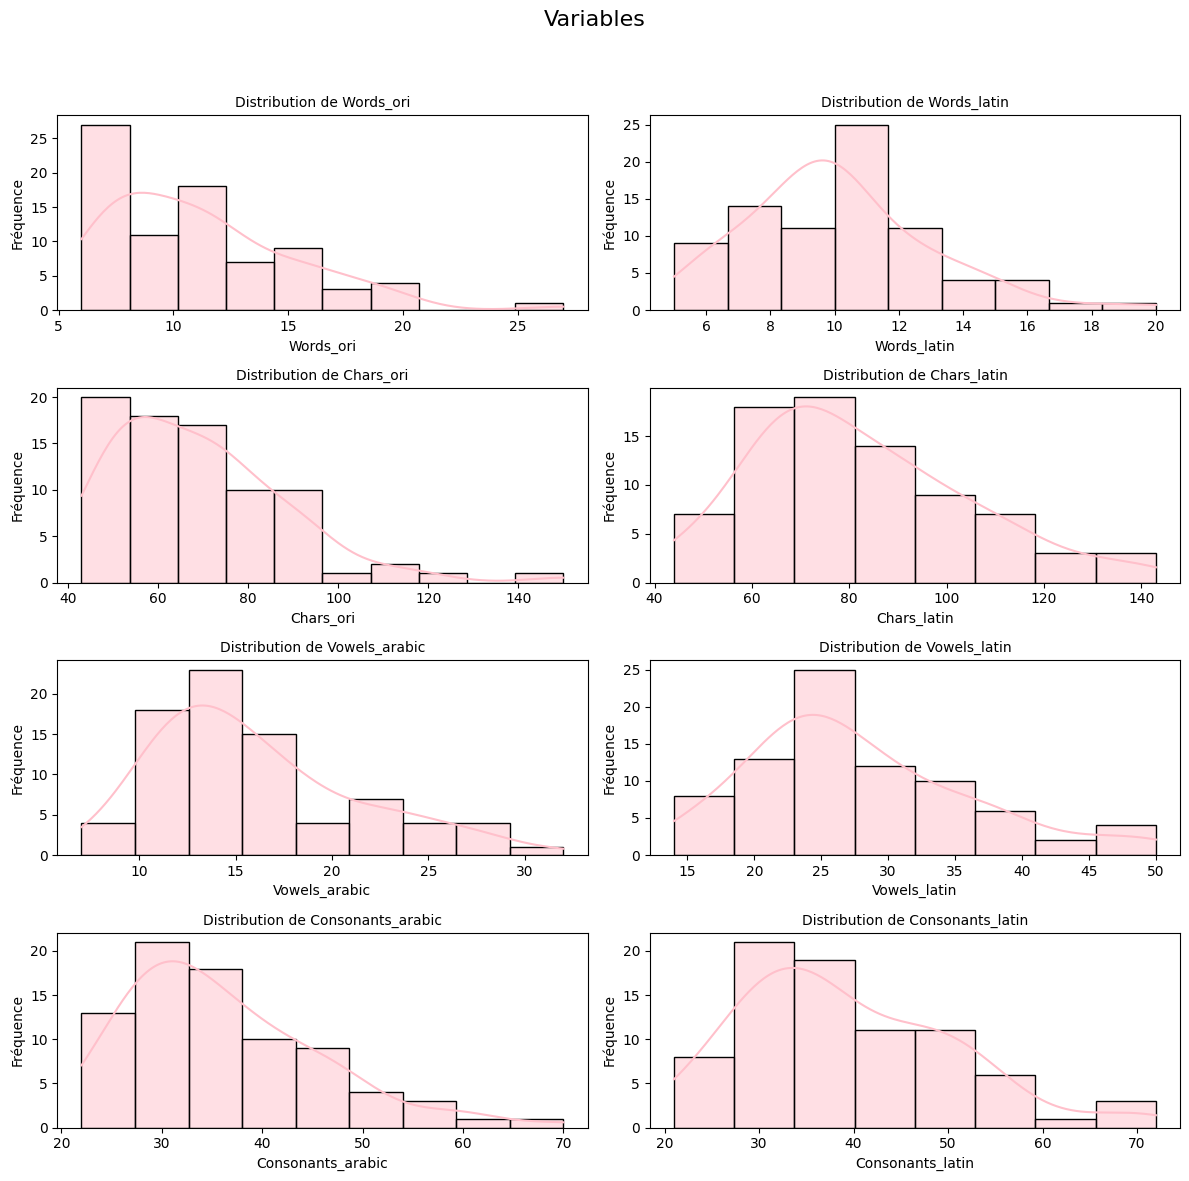

In [7]:
# Liste des colonnes que je souhaite analyser (variables monovariées)
monovariate_cols = [
    'Words_ori', 'Words_latin', 'Chars_ori', 'Chars_latin',
    'Vowels_arabic', 'Vowels_latin', 'Consonants_arabic', 'Consonants_latin'
]

# Création d'une figure avec plusieurs sous-graphiques (4 lignes, 2 colonnes)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))  # J'ai défini une figure de 12x12 pouces pour bien afficher les distributions
axes = axes.flatten()  # Conversion des axes 2D en 1D pour parcourir facilement les graphiques

# Boucle sur les colonnes sélectionnées pour tracer les distributions
for i, col in enumerate(monovariate_cols):  # Parcours de chaque variable dans la liste
    sns.histplot(data=data, x=col, kde=True, color='pink', ax=axes[i])  
    # J'utilise seaborn pour tracer un histogramme avec une courbe KDE superposée (densité estimée)
    # Je personnalise la couleur en rose pour une meilleure visibilité
    
    axes[i].set_title(f"Distribution de {col}", fontsize=10)  # Titre de chaque sous-graphe avec le nom de la variable
    axes[i].set_xlabel(col)  # Étiquette pour l'axe des x (nom de la variable)
    axes[i].set_ylabel("Fréquence")  # Étiquette pour l'axe des y (nombre d'occurrences)

# Titre général pour la figure complète
fig.suptitle("Variables", fontsize=16)  # J'ajoute un titre global pour indiquer le contexte de ces distributions

# Ajustement de la mise en page pour éviter que les sous-graphiques se chevauchent
plt.tight_layout(rect=[0, 0, 1, 0.95])  
# J'utilise un rectangle [0, 0, 1, 0.95] pour laisser de l'espace en haut pour le titre global

# Affichage de la figure
plt.show()  # Enfin, j'affiche le graphique complet



# 4. Test des Hypothèses

### *H1*

**Le passage à l'alphabet latin a réduit le nombre de mots par phrase.**


Shapiro-Wilk Test pour Word_difference: p-value = 0.023563463240861893
Test Wilcoxon signé pour Word_difference: p-value = 0.0002479838355340489


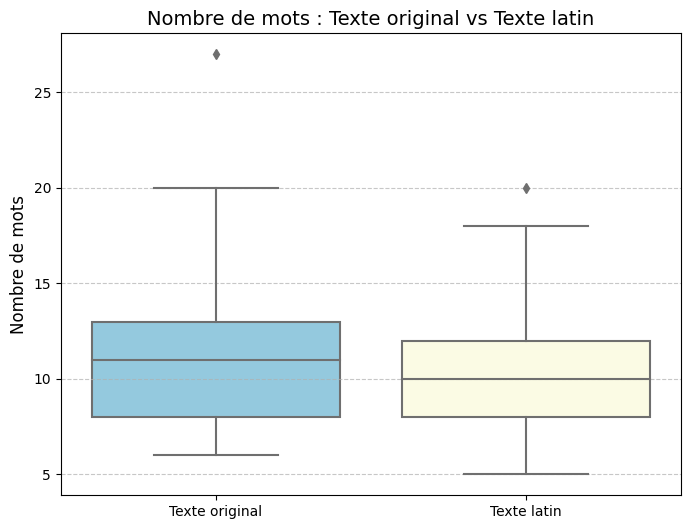

In [8]:
from scipy.stats import shapiro, wilcoxon, ttest_rel  # Importer les tests statistiques nécessaires

# Étape 1 : Calculer la différence de mots
# ----------------------------------------
# Calcul de la différence entre le nombre de mots en texte latin et texte arabe
word_diff = data['Words_latin'] - data['Words_ori']  # Soustraction directe des deux colonnes

# Étape 2 : Tester la normalité des différences
# ---------------------------------------------
# Test de Shapiro-Wilk pour vérifier si la distribution des différences suit une loi normale
stat, p = shapiro(word_diff)  # Appliquer le test sur la différence calculée
print(f"Shapiro-Wilk Test pour Word_difference: p-value = {p}")
# Si p-value > 0.05 : la distribution est normale
# Si p-value <= 0.05 : la distribution n'est pas normale

# Étape 3 : Choix du test statistique
# ------------------------------------
if p > 0.05:  # Si la distribution est normale
    # Appliquer un test t apparié pour les données normales
    stat, p_value = ttest_rel(data['Words_ori'], data['Words_latin'])
    print(f"Test t apparié pour Word_difference: p-value = {p_value}")
else:  # Si la distribution n'est pas normale
    # Appliquer un test non paramétrique (Wilcoxon) pour les données non normales
    stat, p_value = wilcoxon(data['Words_ori'], data['Words_latin'])
    print(f"Test Wilcoxon signé pour Word_difference: p-value = {p_value}")

# Explication des résultats :
# - Si p-value < 0.05 : il existe une différence significative dans le nombre de mots entre les deux alphabets.
# - Si p-value >= 0.05 : aucune différence significative n'est détectée.

# Étape 4 : Visualisation des distributions
# ------------------------------------------
# Création d'un boxplot pour comparer visuellement le nombre de mots
plt.figure(figsize=(8, 6))  # Définir la taille de la figure en pouces (8x6)

# Générer un boxplot pour comparer les deux colonnes
sns.boxplot(data=data[['Words_ori', 'Words_latin']],
            palette=["skyblue", "lightyellow"]  # Couleurs : skyblue pour Texte original, lightyellow pour Texte latin
) 

# Ajouter un titre et des étiquettes pour clarifier le graphique
plt.title("Nombre de mots : Texte original vs Texte latin", fontsize=14)  # Titre global
plt.ylabel("Nombre de mots", fontsize=12)  # Étiquette pour l'axe Y
plt.xticks([0, 1], ["Texte original", "Texte latin"], fontsize=10)  # Renommer les catégories sur l'axe X

# Ajouter une grille horizontale pour faciliter la lecture des valeurs
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille en pointillés avec transparence

# Afficher le graphique
plt.show()


Le test de Shapiro-Wilk montre que la distribution des différences dans le nombre de mots entre les textes en arabe et en latin n'est pas normale. C'est pourquoi le test Wilcoxon signé, qui est non paramétrique, a été utilisé.

Le test Wilcoxon signé donne une p-value très faible (<0.05), indiquant une différence significative dans le nombre de mots entre les textes en alphabet arabe et en alphabet latin.

Il existe donc une différence significative dans le nombre de mots entre les deux alphabets. En pratique, cela signifie que la transcription en alphabet latin modifie la segmentation des phrases, entraînant un changement notable dans le nombre de mots par phrase.

### *H2*

**Il a diminué le nombre de caractères par mot.**


Shapiro-Wilk Test pour Avg_word_length_ori: p-value = 0.01572212018072605
Shapiro-Wilk Test pour Avg_word_length_latin: p-value = 0.21030424535274506
Test Wilcoxon signé pour Avg_word_length: p-value = 3.4391930227338456e-13


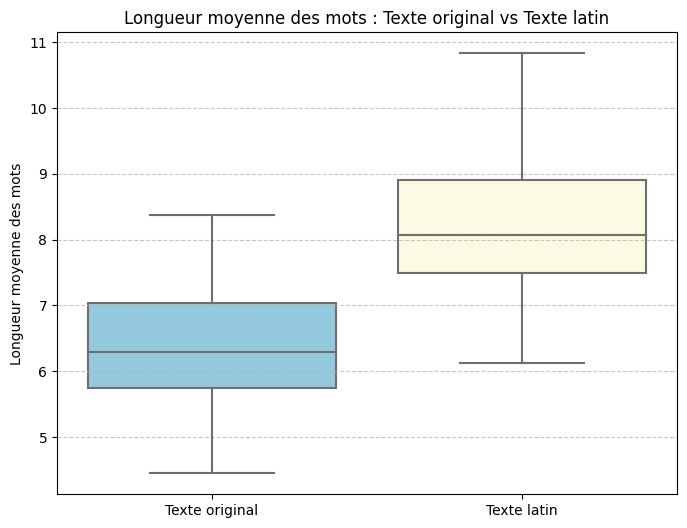

In [9]:
# Étape 1 : Tester la normalité des distributions
# -------------------------------------------------
# Test de Shapiro-Wilk pour la longueur moyenne des mots dans le texte original
# Ce test vérifie si la distribution de 'Avg_word_length_ori' suit une loi normale.
stat_ori, p_ori = shapiro(data['Avg_word_length_ori'])  # Applique le test de Shapiro-Wilk sur la colonne des textes originaux
print(f"Shapiro-Wilk Test pour Avg_word_length_ori: p-value = {p_ori}")

# Test de Shapiro-Wilk pour la longueur moyenne des mots dans le texte latin
# Ce test vérifie si la distribution de 'Avg_word_length_latin' suit une loi normale.
stat_latin, p_latin = shapiro(data['Avg_word_length_latin'])  # Applique le test de Shapiro-Wilk sur la colonne des textes latins
print(f"Shapiro-Wilk Test pour Avg_word_length_latin: p-value = {p_latin}")

# Explication des p-values :
# - Si p-value > 0.05 : la distribution est normale (on ne rejette pas l'hypothèse de normalité).
# - Si p-value <= 0.05 : la distribution n'est pas normale (on rejette l'hypothèse de normalité).

# Étape 2 : Choix du test statistique
# ------------------------------------
# Si les deux distributions sont normales (p-value > 0.05), on utilise un test t apparié.
# Sinon, on utilise le test Wilcoxon signé, adapté pour des données non paramétriques.
if p_ori > 0.05 and p_latin > 0.05:
    # Les deux distributions sont normales, on applique un test t apparié.
    from scipy.stats import ttest_rel  # Importer le test t apparié
    stat, p_value = ttest_rel(data['Avg_word_length_ori'], data['Avg_word_length_latin'])
    print(f"Test t apparié pour Avg_word_length: p-value = {p_value}")
else:
    # Au moins une des distributions n'est pas normale, on applique un test Wilcoxon signé.
    stat, p_value = wilcoxon(data['Avg_word_length_ori'], data['Avg_word_length_latin'])
    print(f"Test Wilcoxon signé pour Avg_word_length: p-value = {p_value}")

# Explication des résultats :
# - Si p-value < 0.05 : il existe une différence significative entre les deux échantillons.
# - Si p-value >= 0.05 : aucune différence significative n'est détectée.

# Étape 3 : Visualisation des distributions
# ------------------------------------------
# Création d'un boxplot pour comparer visuellement les longueurs moyennes des mots
plt.figure(figsize=(8, 6))  # Définir la taille de la figure

# Utilisation de seaborn pour générer un boxplot des deux distributions
sns.boxplot(data=data[['Avg_word_length_ori', 'Avg_word_length_latin']],
            palette=["skyblue", "lightyellow"]  # Couleurs : skyblue pour Texte original, lightyellow pour Texte latin
            )  

# Ajouter un titre et des étiquettes
plt.title("Longueur moyenne des mots : Texte original vs Texte latin")  # Titre du graphique
plt.ylabel("Longueur moyenne des mots")  # Étiquette pour l'axe Y
plt.xticks([0, 1], ["Texte original", "Texte latin"])  # Renommer les catégories sur l'axe X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille horizontale en pointillés pour faciliter la lecture
plt.show()  # Afficher le graphique


Le test de Shapiro-Wilk montre que la distribution des longueurs moyennes des mots en arabe n'est pas normale. C'est pourquoi le test Wilcoxon signé, qui est non paramétrique, a été utilisé.
Le test Wilcoxon signé donne une p-value très faible (<0.05), indiquant une différence significative entre les longueurs moyennes des mots en arabe et en latin.

Il existe donc une différence significative entre les longueurs moyennes des mots en alphabet arabe et en alphabet latin.
En pratique, cela signifie que la transcription en alphabet latin modifie la structure des mots au point d'impacter leur longueur moyenne.

### *H3*


**Il a réduit le nombre de consonnes par mot.**


Shapiro-Wilk Test pour Consonants_per_word_difference: p-value = 0.019071457907557487
Test Wilcoxon signé pour Consonants_per_word_difference: p-value = 2.244294693888616e-07


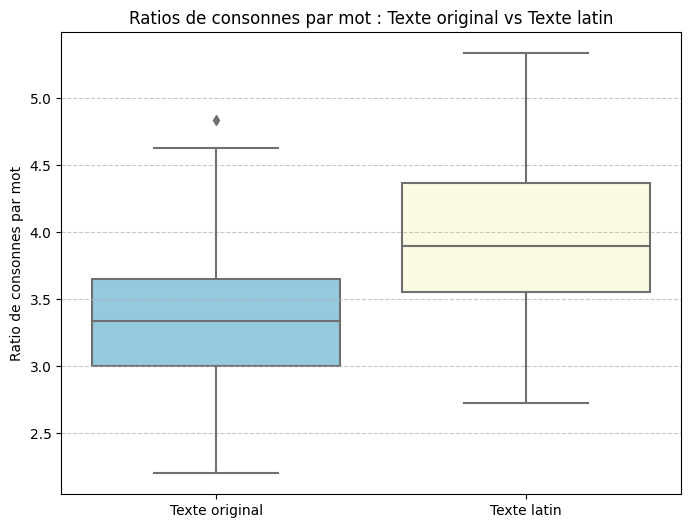

In [10]:
# Étape 1 : Calculer les ratios de consonnes par mot
# --------------------------------------------------
# Calcul des ratios de consonnes par mot en arabe et en latin
data['Consonants_per_word_arabic'] = data['Consonants_arabic'] / data['Words_ori']  # Ratio des consonnes par mot en arabe
data['Consonants_per_word_latin'] = data['Consonants_latin'] / data['Words_latin']  # Ratio des consonnes par mot en latin

# Étape 2 : Tester la normalité des différences
# ---------------------------------------------
# Calcul de la différence entre les ratios de consonnes par mot
diff_consonants = data['Consonants_per_word_latin'] - data['Consonants_per_word_arabic']  # Différence entre les ratios

# Test de Shapiro-Wilk pour vérifier si la distribution des différences suit une loi normale
stat, p = shapiro(diff_consonants)  # Appliquer le test de Shapiro-Wilk
print(f"Shapiro-Wilk Test pour Consonants_per_word_difference: p-value = {p}")
# Explication des p-values :
# - Si p-value > 0.05 : la distribution est normale.
# - Si p-value <= 0.05 : la distribution n'est pas normale.

# Étape 3 : Choix du test statistique
# ------------------------------------
if p > 0.05:
    # Si la distribution est normale, on applique un test t apparié
    stat, p_value = ttest_rel(data['Consonants_per_word_arabic'], data['Consonants_per_word_latin'])
    print(f"Test t apparié pour Consonants_per_word_difference: p-value = {p_value}")
else:
    # Si la distribution n'est pas normale, on applique un test Wilcoxon signé
    stat, p_value = wilcoxon(data['Consonants_per_word_arabic'], data['Consonants_per_word_latin'])
    print(f"Test Wilcoxon signé pour Consonants_per_word_difference: p-value = {p_value}")

# Explication des résultats :
# - Si p-value < 0.05 : il existe une différence significative dans les ratios de consonnes par mot entre les deux alphabets.
# - Si p-value >= 0.05 : aucune différence significative n'est détectée.

# Étape 4 : Visualisation des distributions
# ------------------------------------------
# Création d'un boxplot pour comparer visuellement les ratios de consonnes par mot
plt.figure(figsize=(8, 6))  # Définir la taille de la figure

# Utilisation de seaborn pour générer un boxplot des deux distributions
sns.boxplot(data=[data['Consonants_per_word_arabic'], data['Consonants_per_word_latin']],
            palette=["skyblue", "lightyellow"]  # Couleurs : skyblue pour Texte original, lightyellow pour Texte latin
            )

# Ajouter un titre et des étiquettes
plt.title("Ratios de consonnes par mot : Texte original vs Texte latin")  # Titre global du graphique
plt.ylabel("Ratio de consonnes par mot")  # Étiquette pour l'axe Y
plt.xticks([0, 1], ["Texte original", "Texte latin"])  # Renommer les catégories sur l'axe X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour faciliter la lecture
plt.show()  # Afficher le graphique


Le test de Shapiro-Wilk montre que la distribution des différences des ratios de consonnes par mot entre les textes en arabe et en latin n'est pas normale. C'est pourquoi le test Wilcoxon signé, qui est non paramétrique, a été utilisé.

Le test Wilcoxon signé donne une p-value très faible (<0.05), indiquant une différence significative dans les ratios de consonnes par mot entre les textes en alphabet arabe et ceux en alphabet latin.

Il existe donc une différence significative dans la proportion de consonnes par mot entre les deux alphabets. En pratique, cela signifie que le passage à l'alphabet latin a modifié la structure des mots, impactant la composition en consonnes, probablement en raison des règles de transcription et de la segmentation des mots dans le nouvel alphabet.

### *H4*

**Il a diminué le nombre de voyelles par mot.**

Shapiro-Wilk Test pour Vowels_per_word_difference: p-value = 0.4654826819896698
Test t apparié pour Vowels_per_word_difference: p-value = 1.5545911952492363e-23


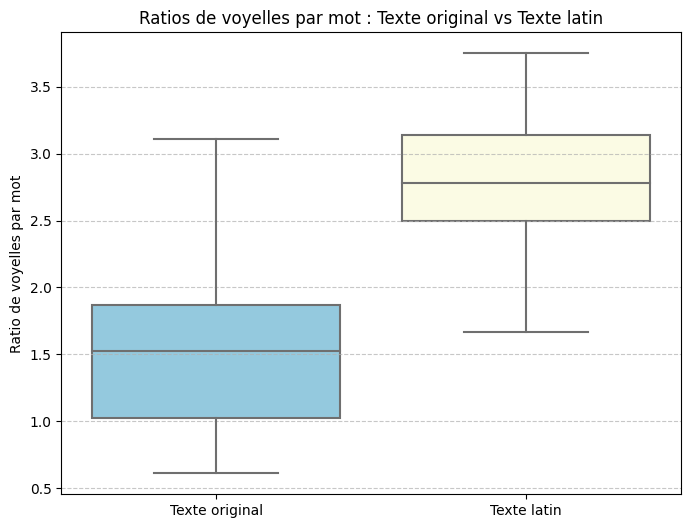

In [11]:
# Étape 1 : Calculer les ratios de voyelles par mot
# -------------------------------------------------
# Calcul des ratios de voyelles par mot en arabe et en latin
data['Vowels_per_word_arabic'] = data['Vowels_arabic'] / data['Words_ori']  # Ratio des voyelles par mot en arabe
data['Vowels_per_word_latin'] = data['Vowels_latin'] / data['Words_latin']  # Ratio des voyelles par mot en latin

# Étape 2 : Tester la normalité des différences
# ---------------------------------------------
# Calcul de la différence entre les ratios de voyelles par mot
diff_vowels = data['Vowels_per_word_latin'] - data['Vowels_per_word_arabic']  # Différence entre les ratios

# Test de Shapiro-Wilk pour vérifier si la distribution des différences suit une loi normale
stat, p = shapiro(diff_vowels)  # Appliquer le test de Shapiro-Wilk
print(f"Shapiro-Wilk Test pour Vowels_per_word_difference: p-value = {p}")
# Explication des p-values :
# - Si p-value > 0.05 : la distribution est normale.
# - Si p-value <= 0.05 : la distribution n'est pas normale.

# Étape 3 : Choix du test statistique
# ------------------------------------
if p > 0.05:
    # Si la distribution est normale, on applique un test t apparié
    stat, p_value = ttest_rel(data['Vowels_per_word_arabic'], data['Vowels_per_word_latin'])
    print(f"Test t apparié pour Vowels_per_word_difference: p-value = {p_value}")
else:
    # Si la distribution n'est pas normale, on applique un test Wilcoxon signé
    stat, p_value = wilcoxon(data['Vowels_per_word_arabic'], data['Vowels_per_word_latin'])
    print(f"Test Wilcoxon signé pour Vowels_per_word_difference: p-value = {p_value}")

# Explication des résultats :
# - Si p-value < 0.05 : il existe une différence significative dans les ratios de voyelles par mot entre les deux alphabets.
# - Si p-value >= 0.05 : aucune différence significative n'est détectée.

# Étape 4 : Visualisation des distributions
# ------------------------------------------
# Création d'un boxplot pour comparer visuellement les ratios de voyelles par mot
plt.figure(figsize=(8, 6))  # Définir la taille de la figure

# Utilisation de seaborn pour générer un boxplot des deux distributions
sns.boxplot(data=[data['Vowels_per_word_arabic'], data['Vowels_per_word_latin']],
            palette=["skyblue", "lightyellow"]  # Couleurs : skyblue pour Texte original, lightyellow pour Texte latin
            )

# Ajouter un titre et des étiquettes
plt.title("Ratios de voyelles par mot : Texte original vs Texte latin")  # Titre global
plt.ylabel("Ratio de voyelles par mot")  # Étiquette pour l'axe Y
plt.xticks([0, 1], ["Texte original", "Texte latin"])  # Renommer les catégories sur l'axe X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille horizontale pour faciliter la lecture
plt.show()  # Afficher le graphique


Le test de Shapiro-Wilk montre que la distribution des différences des ratios de voyelles par mot entre les textes en arabe et en latin est normale. Par conséquent, un test t apparié a été utilisé.

Le test t apparié donne une p-value très faible (<0.05), indiquant une différence significative dans les ratios de voyelles par mot entre les textes en alphabet arabe et ceux en alphabet latin.

Il existe donc une différence significative dans la proportion de voyelles par mot entre les deux alphabets. En pratique, cela signifie que le passage à l'alphabet latin modifie la composition des mots en termes de voyelles, probablement en raison des conventions orthographiques propres à chaque alphabet.

### *Test global*


Après avoir testé les hypothèses H1 à H4 individuellement, la régression multiple permet de comprendre l’effet combiné des variables indépendantes (par exemple: Char_difference, Word_difference, etc.) sur le nombre de mots en alphabet latin (Words_latin).

Les hypothèses H1 à H4 ont mis en évidence l'impact individuel de certaines variables sur les textes latins. La régression multiple complète cette analyse en évaluant l’effet simultané de plusieurs prédicteurs.

In [12]:
# Variables explicatives et cible
# -------------------------------
# X contient les variables explicatives qui influencent potentiellement la variable cible.
X = data[['Char_difference', 'Word_difference', 'Consonants_arabic', 'Vowels_arabic']]  
# Variables incluses :
# - 'Char_difference' : Différence du nombre de caractères entre les deux alphabets.
# - 'Word_difference' : Différence du nombre de mots entre les deux alphabets.
# - 'Consonants_arabic' : Nombre de consonnes dans le texte original (arabe).
# - 'Vowels_arabic' : Nombre de voyelles dans le texte original (arabe).

y = data['Words_latin']  # Variable cible (nombre de mots dans le texte latin).

# Ajouter une constante
# ---------------------
# Ajout d'une constante à X pour représenter l'ordonnée à l'origine dans le modèle de régression.
X = sm.add_constant(X)  # La constante permet d'inclure un terme d'interception dans le modèle.

# Régression
# ----------
# Initialisation et ajustement du modèle de régression linéaire multiple.
model = sm.OLS(y, X).fit()  # Utilisation de la méthode des moindres carrés ordinaires (OLS) pour ajuster le modèle.

# Résumé du modèle
print(model.summary())  # Afficher un résumé statistique complet du modèle ajusté.




                            OLS Regression Results                            
Dep. Variable:            Words_latin   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     83.80
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           6.72e-27
Time:                        15:39:13   Log-Likelihood:                -129.25
No. Observations:                  80   AIC:                             268.5
Df Residuals:                      75   BIC:                             280.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5713      0.63

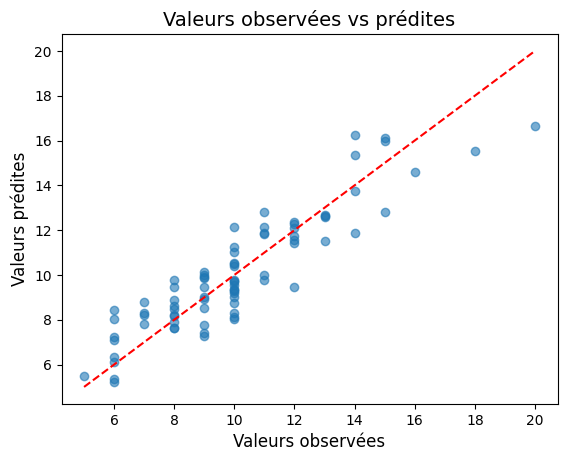

In [13]:
# Valeurs observées vs prédites
# -----------------------------
predicted = model.predict(X)  # Prédictions générées par le modèle ajusté
observed = y  # Valeurs réellement observées dans les données

# Création du graphique
plt.scatter(observed, predicted, alpha=0.6)  # Nuage de points des valeurs observées vs prédites
plt.plot(
    [observed.min(), observed.max()],  # Abscisses (min et max des valeurs observées)
    [observed.min(), observed.max()],  # Ordonnées (min et max des valeurs observées)
    color='red', linestyle='--'  # Ligne diagonale rouge en pointillés (référence parfaite)
)
plt.title("Valeurs observées vs prédites", fontsize=14)  # Titre du graphique
plt.xlabel("Valeurs observées", fontsize=12)  # Étiquette de l'axe X
plt.ylabel("Valeurs prédites", fontsize=12)  # Étiquette de l'axe Y
plt.show()  # Affichage du graphique





Le modèle de régression multiple, expliquant le nombre de mots en alphabet latin (Words_latin), est globalement **très significatif** (R^2 = 0.817, p < 0.001). Cela montre qu’il explique **81,7 % de la variance** dans la variable dépendante. Ce résultat reflète un excellent pouvoir explicatif des prédicteurs inclus dans le modèle.

Prédicteurs significatifs :
1. Char_difference (p = 0.002) :  
   Chaque unité de différence de caractères entre les textes en arabe et en latin augmente le nombre de mots en latin de 0.0513 en moyenne.
   
2. Word_difference (p < 0.001) :  
   Chaque unité de différence de mots entre les deux systèmes d’écriture augmente le nombre de mots en latin de 0.372 en moyenne.
   
3. Consonants_arabic (p < 0.001) :  
   Chaque consonne dans le texte arabe contribue à une augmentation de 0.2953 mots dans le texte en latin.

Prédicteur non significatif :
- Vowels_arabic (p = 0.60) :  
  Les voyelles en arabe n’ont pas d’effet significatif sur le nombre de mots en latin.


Les différences dans la structure des caractères et des mots, ainsi que le nombre de consonnes en arabe, sont des facteurs clés influençant la structuration des textes en alphabet latin. En revanche, les voyelles en arabe n’ont pas d’impact significatif, ce qui suggère que l’influence principale réside dans la segmentation et l’orthographe des consonnes lors de la transcription.

Ce modèle offre une compréhension robuste des dynamiques entre les deux systèmes d’écriture, avec des implications linguistiques importantes concernant la transition vers l’alphabet latin.


# 5. Conclusion Globale: 




Cette étude a exploré l'impact de la transition de l'alphabet arabe à l'alphabet latin sur la structure linguistique des textes, en s'appuyant sur des tests d'hypothèses et une régression multiple. Les résultats montrent des modifications significatives dans les caractéristiques des textes, notamment :

1. Une **réduction du nombre de mots** (H1), confirmée par des différences significatives dans les structures lexicales entre les deux alphabets.
2. Une **modification de la longueur moyenne des mots** (H2), liée aux conventions orthographiques propres à l'alphabet latin.
3. Des **changements dans les ratios de consonnes et de voyelles par mot** (H3 et H4), mettant en évidence un impact plus marqué des consonnes que des voyelles dans la transition.

La régression multiple a permis d’approfondir ces analyses en considérant les effets combinés de plusieurs facteurs. Elle a révélé que des variables comme la différence dans le nombre de caractères, de mots, et la présence de consonnes en arabe jouent un rôle clé dans la structuration des textes en alphabet latin, tandis que les voyelles n’ont pas d’effet significatif.


- Limites de l’étude : 

Cette étude se concentre sur des textes spécifiques et des caractéristiques linguistiques mesurables. Cependant, des aspects plus qualitatifs, tels que l’impact sémantique ou stylistique de la transcription, n’ont pas été explorés ici. De plus, le modèle statistique utilisé est linéaire, ce qui limite l’analyse des interactions complexes entre les prédicteurs.


- Pour aller plus loin, plusieurs pistes peuvent être envisagées :

1. **Étude comparative des styles linguistiques** : Analyser l’impact de la transcription sur les structures grammaticales ou stylistiques des textes.
2. **Exploration de la phonologie** : Évaluer comment les sons transcrits diffèrent entre les deux systèmes d’écriture.
3. **Analyse des données à plus grande échelle** : Étendre l’étude à des corpus variés et plus volumineux, incluant d'autres langues turcophones.
4. **Modélisation avancée** : Utiliser des modèles non linéaires ou de machine learning pour détecter des relations plus complexes entre les variables.
5. **Étude de l’impact culturel** : Examiner comment le passage à l’alphabet latin a influencé l’apprentissage et l’appropriation des langues au sein des communautés concernées.


Ces analyses complémentaires permettront d’approfondir la compréhension des dynamiques linguistiques et culturelles liées à la transition entre alphabets, tout en enrichissant les approches méthodologiques pour de futures études.


N.B: Pour le code, je me suis notamment aidée de ChatGPT.